In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Alg.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [5]:

df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [6]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [7]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
X = df.drop('FWI',axis=1)
y = df['FWI']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

<Axes: >

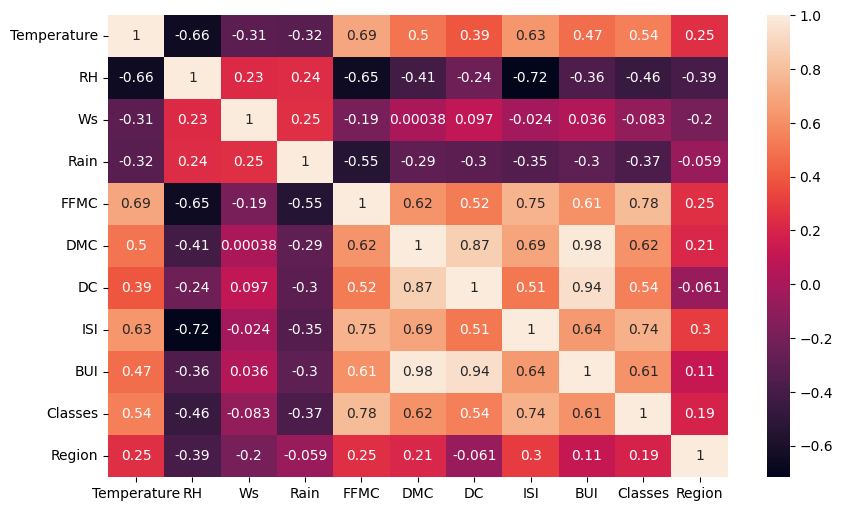

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(),annot=True)

In [12]:
def correlation(dataset,threshold):
    mat = dataset.corr()
    multicol = set()
    for i in range(len(mat.columns)):
        for j in range(i):
            if abs(mat.iloc[i,j])>threshold:
                multicol.add(mat.columns[i])
    return multicol

In [13]:
X_new = correlation(X_train,0.85)

In [14]:
X_new

{'BUI', 'DC'}

In [15]:
X_test.drop(X_new,axis=1,inplace=True)
X_train.drop(X_new,axis=1,inplace=True)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Text(0.5, 1.0, 'Before scaling')

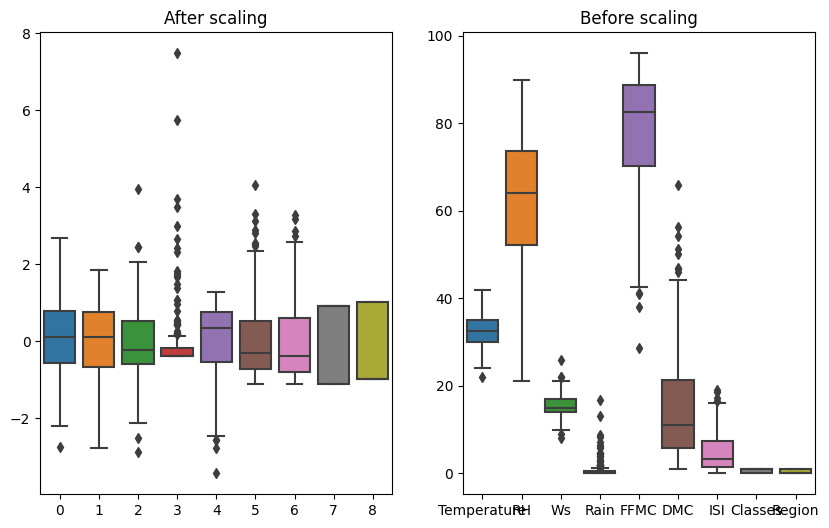

In [17]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.boxplot(data=X_train_scaled)

plt.title('After scaling')
plt.subplot(122)
sns.boxplot(data=X_train)
plt.title('Before scaling')

##
LINEAR REGRESSION

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linreg = LinearRegression()

In [21]:
linreg.fit(X_train_scaled,y_train)

LinearRegression()

In [22]:
y_pred = linreg.predict(X_test_scaled)

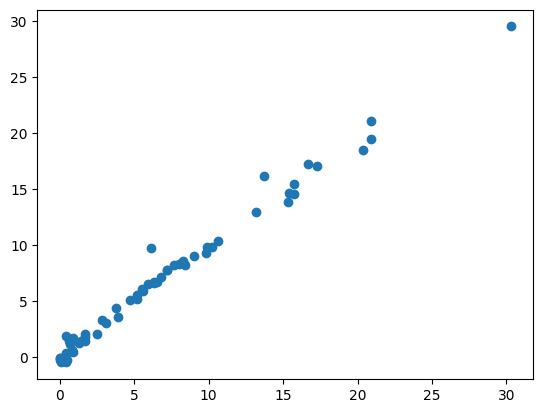

In [32]:
plt.scatter(y_test,y_pred)

In [34]:
from sklearn.metrics import r2_score,mean_absolute_error

In [35]:
mean_absolute_error(y_test,y_pred)

0.546823646524997

In [36]:
r2_score(y_test,y_pred)

0.9847657384266951

Lasso Regression

In [39]:
from sklearn.linear_model import Lasso

In [43]:
lreg = Lasso()

In [44]:
lreg.fit(X_train_scaled,y_train)

Lasso()

In [45]:
y_pred = lreg.predict(X_test_scaled)

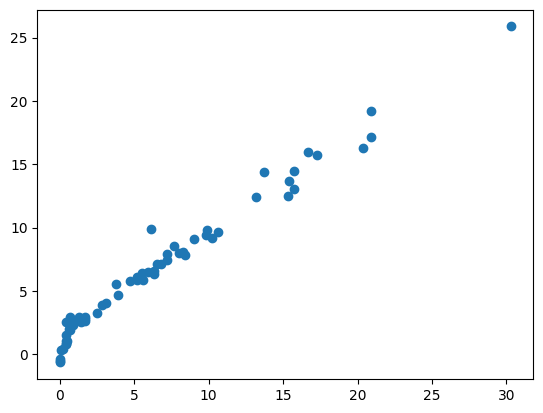

In [46]:
plt.scatter(y_test,y_pred)

In [47]:
mean_absolute_error(y_test,y_pred)

1.133175994914409

In [48]:
r2_score(y_test,y_pred)

0.9492020263112388

In [49]:
from sklearn.linear_model import LassoCV

In [51]:
lcv = LassoCV(cv=10)

In [52]:
lcv.fit(X_train_scaled,y_train)

LassoCV(cv=10)

In [53]:
y_pred = lcv.predict(X_test_scaled)

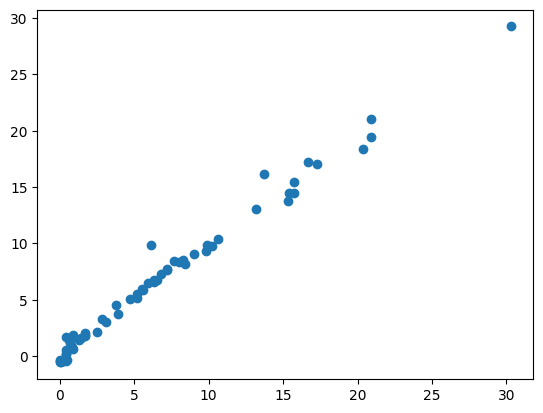

In [54]:
plt.scatter(y_test,y_pred)

In [55]:
mean_absolute_error(y_test,y_pred)

0.5721047420583084

In [57]:
r2_score(y_test,y_pred)

0.9838526335588409

## Ridge Regression

In [58]:
from sklearn.linear_model import Ridge

In [59]:
r = Ridge()

In [60]:
r.fit(X_train_scaled,y_train)

Ridge()

In [61]:
y_pred = r.predict(X_test_scaled)

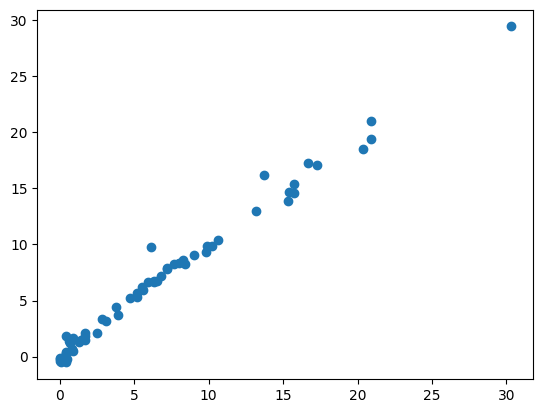

In [62]:
plt.scatter(y_test,y_pred)

In [63]:
mean_absolute_error(y_test,y_pred)

0.5642305340105691

In [64]:
r2_score(y_test,y_pred)

0.9842993364555513

In [65]:
from sklearn.linear_model import RidgeCV

In [78]:
rcv = RidgeCV(cv=5)

In [79]:
rcv.fit(X_train_scaled,y_train)

RidgeCV(cv=5)

In [80]:
y_pred = rcv.predict(X_test_scaled)

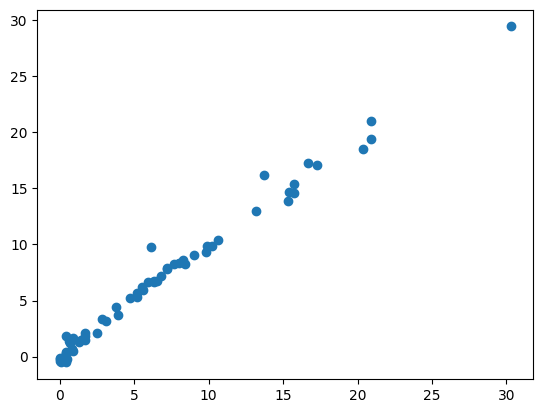

In [81]:
plt.scatter(y_test,y_pred)

In [82]:
mean_absolute_error(y_test,y_pred)

0.5642305340105691

In [83]:
r2_score(y_test,y_pred)

0.9842993364555513

In [84]:
from sklearn.linear_model import ElasticNet

In [85]:
e = ElasticNet()

In [87]:
e.fit(X_train_scaled,y_train)

ElasticNet()

In [89]:
y_pred = e.predict(X_test_scaled)

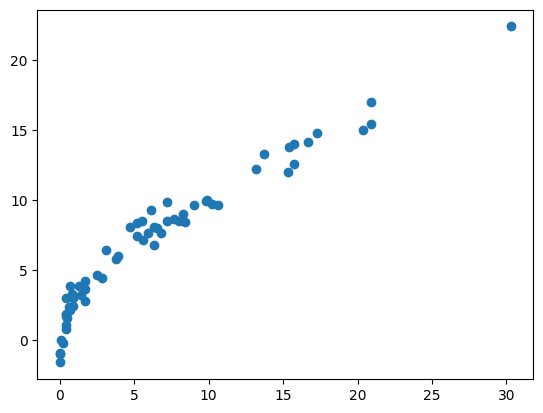

In [90]:
plt.scatter(y_test,y_pred)

In [91]:
mean_absolute_error(y_test,y_pred)

1.8822353634896

In [92]:
r2_score(y_test,y_pred)

0.8753460589519703

In [93]:
from sklearn.linear_model import ElasticNetCV

In [94]:
ecv = ElasticNetCV()

In [95]:
ecv.fit(X_train_scaled,y_train)

ElasticNetCV()

In [96]:
y_pred =ecv.predict(X_test_scaled)

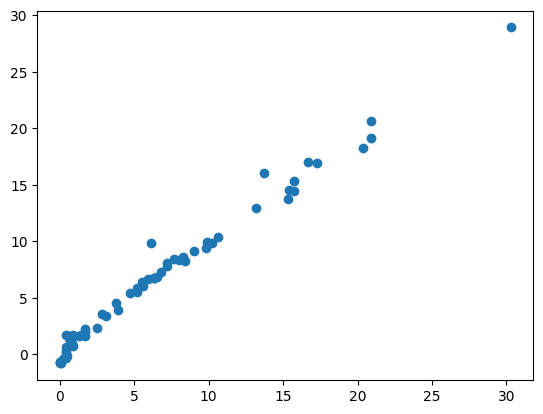

In [97]:
plt.scatter(y_test,y_pred)

In [98]:
mean_absolute_error(y_test,y_pred)

0.6575946731430901

In [99]:
r2_score(y_test,y_pred)

0.9814217587854941

In [101]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(r,open('ridge.pkl','wb'))